In [1]:
pip install scipy xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install arch

     |████████████████████████████████| 873 kB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sst
import math

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from statsmodels.formula.api import ols

import statsmodels.api as sm
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics import tsaplots

In [7]:
Ch17data = pd.read_excel('/Users/jennifer/Desktop/Baruch F21/ECO 9723 Econometrics/Data/us_macro_quarterly.xlsx')
Ch17data

,freq,GDPC1,GDPGR,JAPAN_IP,PCECTPI,CPIAUCSL
0,1955-01-01,2683.766,NaN,NaN,15.755,26.793333
1,1955-04-01,2727.452,6.458723,NaN,15.771,26.756667
2,1955-07-01,2764.128,5.342950,NaN,15.834,26.776667
3,1955-10-01,2780.762,2.399911,NaN,15.878,26.856667
4,1956-01-01,2770.032,-1.546447,NaN,15.943,26.860000
...,...,...,...,...,...,...
247,2016-10-01,16851.420,1.743040,99.125073,111.583,242.177333
248,2017-01-01,16903.240,1.228157,99.291726,112.198,243.949000
249,2017-04-01,17031.085,3.013954,101.324890,112.273,244.010000
250,2017-07-01,17163.894,3.107115,101.724856,112.699,245.296667


In [8]:
Ch17data['l1_GDPC1'] = Ch17data['GDPC1'].shift(1)
Ch17data['GDPGR']=400*(np.log(Ch17data['GDPC1'])-np.log(Ch17data['l1_GDPC1']))
Ch17data

,freq,GDPC1,GDPGR,JAPAN_IP,PCECTPI,CPIAUCSL,l1_GDPC1
0,1955-01-01,2683.766,NaN,NaN,15.755,26.793333,NaN
1,1955-04-01,2727.452,6.458723,NaN,15.771,26.756667,2683.766
2,1955-07-01,2764.128,5.342950,NaN,15.834,26.776667,2727.452
3,1955-10-01,2780.762,2.399911,NaN,15.878,26.856667,2764.128
4,1956-01-01,2770.032,-1.546447,NaN,15.943,26.860000,2780.762
...,...,...,...,...,...,...,...
247,2016-10-01,16851.420,1.743040,99.125073,111.583,242.177333,16778.148
248,2017-01-01,16903.240,1.228157,99.291726,112.198,243.949000,16851.420
249,2017-04-01,17031.085,3.013954,101.324890,112.273,244.010000,16903.240
250,2017-07-01,17163.894,3.107115,101.724856,112.699,245.296667,17031.085


In [9]:
from arch.univariate import ARX
ar = ARX(Ch17data['GDPGR'][1:251], lags=2)
ar.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     AR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:                  GDPGR   R-squared:                       0.120
Mean Model:                        AR   Adj. R-squared:                  0.113
Vol Model:          Constant Variance   Log-Likelihood:               -643.671
Distribution:                  Normal   AIC:                           1295.34
Method:            Maximum Likelihood   BIC:                           1309.40
                                        No. Observations:                  248
Date:                Thu, Dec 09 2021   Df Residuals:                      245
Time:                        04:43:29   Df Model:                            3
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          1.7564      0.370      4.750  2.034e-06    [  1.032,  2.481]
GDPGR[1]       0.2950  7.674e-02      3.844  1.211e-04    [  0.145,  0.445]
GDPGR[2]       0.1069  7.873e-02      1.358      0.174 [-4.736e-02,  0.261]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
sigma2        10.5172      1.297      8.106  5.229e-16 [  7.974, 13.060]
========================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

In [10]:
from arch.univariate import ARCH, GARCH
ar.volatility = GARCH(p=1,q=1)
#ar.volatility = ARCH(p=1)
res = ar.fit(update_freq=0, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                  GDPGR   R-squared:                       0.111
Mean Model:                        AR   Adj. R-squared:                  0.103
Vol Model:                      GARCH   Log-Likelihood:               -620.751
Distribution:                  Normal   AIC:                           1253.50
Method:            Maximum Likelihood   BIC:                           1274.58
                                        No. Observations:                  248
Date:                Thu, Dec 09 2021   Df Residuals:                      245
Time:                        04:43:31   Df Model:                            3
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          1.5647      0.255      6.127  8.962e-10   [  1.064,  2.065]
GDPGR[1]       0.3027  7.179e-02      4.217  2.477e-05   [  0.162,  0.443]
GDPGR[2]       0.1959  6.599e-02      2.969  2.992e-03 [6.656e-02,  0.325]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4026      0.276      1.458      0.145   [ -0.139,  0.944]
alpha[1]       0.2094  9.399e-02      2.227  2.591e-02 [2.514e-02,  0.394]
beta[1]        0.7656  8.036e-02      9.527  1.623e-21   [  0.608,  0.923]
==========================================================================

Covariance estimator: robust
"""

In [11]:
Coef=res.params
Coef

Const       1.564656
GDPGR[1]    0.302721
GDPGR[2]    0.195896
omega       0.402603
alpha[1]    0.209353
beta[1]     0.765606
Name: params, dtype: float64

In [12]:
dev_mean_GDPGR=Ch17data['GDPGR'][1:251]-Coef[0]

In [13]:
upper_bound=Coef[0]+res.conditional_volatility
lower_bound=Coef[0]-res.conditional_volatility

Text(0, 0.5, 'Percent')

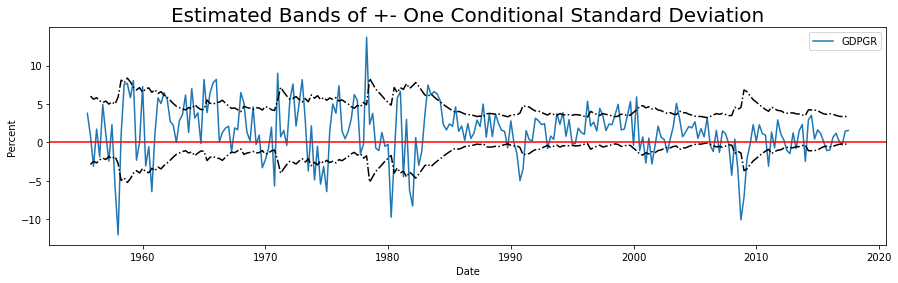

In [18]:
plt.figure(figsize=(15,4))
plt.plot(Ch17data['freq'][2:251],dev_mean_GDPGR[1:251])
plt.plot(Ch17data['freq'][2:251],upper_bound[1:251],color='black', linestyle='-.')
plt.plot(Ch17data['freq'][2:251],lower_bound[1:251],color='black', linestyle='-.')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Estimated Bands of +- One Conditional Standard Deviation',fontsize=20)
plt.legend(['GDPGR'],fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Percent",fontsize=10)

/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


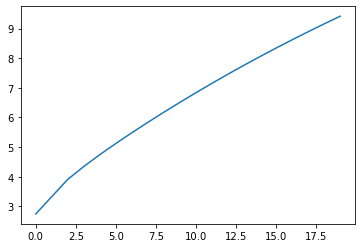

In [13]:
# Extra: Forecasting
# forecast the test set

from matplotlib import pyplot
forecast = res.forecast(horizon=20)
pyplot.plot(forecast.variance.values[-1, :])
pyplot.show()

In [ ]:
#####